In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


1.  Load the "NYPD_Shooting_Incident_Data__Historic_.csv" dataframe.  Make sure the data frame loaded correctly.  You can examine the coding guide for the dataset:  https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8   
2.  Examine the datatype of each variable
3.  What is the shape of the dataset?
4.  Examine the Series "OCCUR_DATE".  What information did you learn from examining this column?   
5.  Do a "frequency distribution" for the months where shootings have occurred.  What month had the most number of shootings?
6.  Plot a bar graph visualizing the precincts with the 10 highest shooting incidents.
7.  Plot the number of shooting incidents per borough.  Google and add a title to your graph, as well as x and y axis labels.
8. Create a dataframe of shootings in the Bronx where the victim was a White Hispanic
9. Make two dataframes -- one showing day shootings (9 am - 9 pm, inclusive) and one showing night shootings.
10.  Plot a graph of day shootings and one of night shootings.  What do you notice?

In [5]:
shooting = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
shooting

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
1,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
2,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,18-24,M,BLACK,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
3,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
4,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,206875589,12/30/2019,03:17:00,BROOKLYN,81,0,NaN,False,NaN,NaN,NaN,45-64,M,BLACK HISPANIC,1006612,189509,40.686815,-73.919370,POINT (-73.91936988499998 40.68681516500004)
822,206882664,12/30/2019,21:29:00,BROOKLYN,71,0,NaN,False,25-44,M,BLACK,25-44,M,BLACK,1000996,178614,40.656923,-73.939647,POINT (-73.93964677899999 40.656923240000026)
823,206875589,12/30/2019,03:17:00,BROOKLYN,81,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1006612,189509,40.686815,-73.919370,POINT (-73.91936988499998 40.68681516500004)
824,206890929,12/31/2019,23:15:00,MANHATTAN,28,0,HOTEL/MOTEL,True,25-44,M,BLACK,25-44,M,BLACK,997155,230828,40.800244,-73.953390,POINT (-73.95339008999997 40.80024432600004)


In [5]:
shooting.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE            int64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                  object
Y_COORD_CD                  object
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [6]:
shooting.shape

(826, 19)

In [7]:
shooting["OCCUR_DATE"]

0      07/03/2019
1      07/03/2019
2      07/03/2019
3      07/03/2019
4      07/03/2019
          ...    
821    12/30/2019
822    12/30/2019
823    12/30/2019
824    12/31/2019
825    12/31/2019
Name: OCCUR_DATE, Length: 826, dtype: object

In [8]:
shooting["OCCUR_DATE"] = pd.to_datetime(shooting["OCCUR_DATE"])

In [12]:
monthly_count = shooting["OCCUR_DATE"].dt.month.value_counts()
monthly_count

7     235
8     209
9     171
10     80
11     69
12     62
Name: OCCUR_DATE, dtype: int64

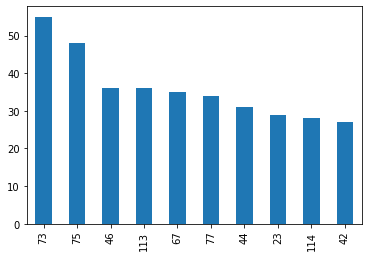

In [23]:
top10_precinct = shooting["PRECINCT"].value_counts().head(n=10)
top10_precinct.plot(kind ='bar')
plt.show()

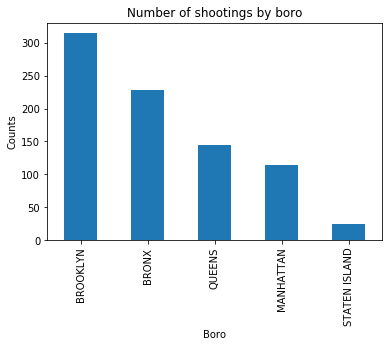

In [31]:
shooting["BORO"].value_counts().plot(kind = 'bar', title = "Number of shootings by boro")
plt.xlabel("Boro")
plt.ylabel("Counts")
plt.show()

In [51]:
white = shooting['VIC_RACE'] == 'WHITE HISPANIC' 
bronx = shooting['BORO'] == 'BRONX'
whitebronx_vic = shooting[white & bronx]
whitebronx_vic

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
22,199403136,2019-07-05,21:25:00,BRONX,47,0,NaN,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,"1,020,357","259,231",40.878138,-73.869434,POINT (-73.86943433699997 40.87813788000005)
23,199401908,2019-07-05,17:20:00,BRONX,41,0,PVT HOUSE,False,18-24,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,"1,015,346","236,367",40.815402,-73.887661,POINT (-73.88766070399998 40.815402050000046)
26,199401908,2019-07-05,17:20:00,BRONX,41,0,PVT HOUSE,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1015346,236367,40.815402,-73.887661,POINT (-73.88766070399998 40.815402050000046)
31,199325319,2019-07-05,04:25:00,BRONX,52,0,NaN,False,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,"1,014,384","256,796",40.871477,-73.891044,POINT (-73.89104432799998 40.87147697300003)
32,199325319,2019-07-05,04:25:00,BRONX,52,0,NaN,False,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1014384,256796,40.871477,-73.891044,POINT (-73.89104432799998 40.87147697300003)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,204464564,2019-11-04,13:40:00,BRONX,40,0,NaN,True,45-64,M,BLACK,25-44,M,WHITE HISPANIC,1008120,238322,40.820790,-73.913759,POINT (-73.91375915499998 40.82079045300003)
729,205177556,2019-11-14,00:59:00,BRONX,44,0,NaN,False,NaN,NaN,NaN,18-24,M,WHITE HISPANIC,1004530,242729,40.832895,-73.926716,POINT (-73.92671649599998 40.83289538100007)
756,205748550,2019-11-27,23:30:00,BRONX,45,0,NaN,False,18-24,M,BLACK,18-24,F,WHITE HISPANIC,1032140,242004,40.830799,-73.826949,POINT (-73.82694879599995 40.83079891400007)
757,205748550,2019-11-27,23:30:00,BRONX,45,0,NaN,False,18-24,M,BLACK,18-24,M,WHITE HISPANIC,1032140,242004,40.830799,-73.826949,POINT (-73.82694879599995 40.83079891400007)


In [11]:
after9am = '00:09:00' <= shooting['OCCUR_TIME']
before9pm = shooting['OCCUR_TIME'] <= '00:21:00'
daytime = shooting[after9am & before9pm]
daytime

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
27,199325324,07/05/2019,00:10:00,BROOKLYN,75,0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,"1,016,729","184,070",40.671855,-73.882917,POINT (-73.88291686099996 40.67185501100005)
28,199325324,07/05/2019,00:10:00,BROOKLYN,75,0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,1016729,184070,40.671855,-73.882917,POINT (-73.88291686099996 40.67185501100005)
36,199325324,07/05/2019,00:10:00,BROOKLYN,75,0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1016729,184070,40.671855,-73.882917,POINT (-73.88291686099996 40.67185501100005)
42,199325324,07/05/2019,00:10:00,BROOKLYN,75,0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,"1,016,729","184,070",40.671855,-73.882917,POINT (-73.88291686099996 40.67185501100005)
271,200856233,08/08/2019,00:13:00,STATEN ISLAND,121,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,"937,223","171,002",40.635921,-74.169439,POINT (-74.16943934199998 40.635920928000075)
273,200856233,08/08/2019,00:13:00,STATEN ISLAND,121,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,937223,171002,40.635921,-74.169439,POINT (-74.16943934199998 40.635920928000075)
512,202457203,09/14/2019,00:09:00,MANHATTAN,34,0,NaN,True,NaN,NaN,NaN,18-24,M,WHITE HISPANIC,1003133,249705,40.852046,-73.931745,POINT (-73.93174513099996 40.85204555700005)
514,202457203,09/14/2019,00:09:00,MANHATTAN,34,0,NaN,True,NaN,NaN,NaN,18-24,M,WHITE HISPANIC,"1,003,133","249,705",40.852046,-73.931745,POINT (-73.93174513099996 40.85204555700005)
524,202504682,09/16/2019,00:20:00,BROOKLYN,88,2,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,"990,325","192,487",40.695015,-73.978094,POINT (-73.97809388299999 40.69501525100002)
526,202504682,09/16/2019,00:20:00,BROOKLYN,88,2,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,990325,192487,40.695015,-73.978094,POINT (-73.97809388299999 40.69501525100002)


In [14]:
after9pm = '00:21:00' >= shooting['OCCUR_TIME'] 
before9am = shooting['OCCUR_TIME'] <= '00:09:00' 
nighttime = shooting[after9pm & before9am]
nighttime

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
1,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,25-44,M,WHITE HISPANIC,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
2,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,<18,M,WHITE,18-24,M,BLACK,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
3,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
4,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,M,BLACK,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
5,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,25-44,M,WHITE HISPANIC,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
6,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,25-44,M,WHITE HISPANIC,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
7,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,UNKNOWN,U,UNKNOWN,25-44,M,WHITE HISPANIC,999925,214507,40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
8,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)
9,199247701,07/03/2019,00:04:00,QUEENS,114,2,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,"999,925","214,507",40.755443,-73.943423,POINT (-73.94342324599995 40.755443005000075)


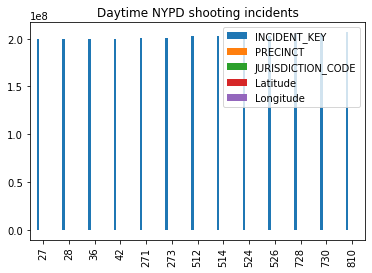

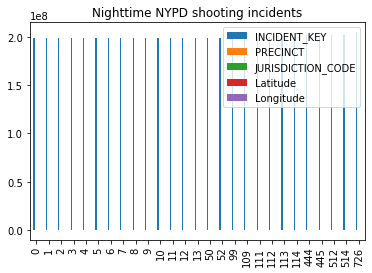

In [23]:
daytime.plot(kind ='bar', title = 'Daytime NYPD shooting incidents')
plt.show()
nighttime.plot(kind = 'bar', title = 'Nighttime NYPD shooting incidents')
plt.show()